<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Run-ME-FO,-ME-SO-and-ME-FOSC" data-toc-modified-id="Run-ME-FO,-ME-SO-and-ME-FOSC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Run ME-FO, ME-SO and ME-FOSC</a></span></li><li><span><a href="#Plot-total-travel-time" data-toc-modified-id="Plot-total-travel-time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot total travel time</a></span></li><li><span><a href="#Run-ORHP" data-toc-modified-id="Run-ORHP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run ORHP</a></span></li></ul></div>

# ME-FO, ME-SO, and ME-FOSC

In [5]:
import time
import pickle
import os.path
import numpy as np
import matplotlib.pyplot as plt
import sympy
import networkx as nx
import os

directory = 'Data/Networks/SiouxFalls/'
net_file = '{}SiouxFalls_net.tntp'.format(directory)
trip_file = '{}SiouxFalls_trips (GA).tntp'.format(directory)
node_file = '{}SiouxFalls_node.tntp'.format(directory)
net_name = 'SiouxFalls'

file_ME_TTT = directory + "output/{}/mu_t_1.5_mu_p_2.0_downtown_{}/record of TTT_FTT_FC.pickle"

downtown factor 1, (1801515.894046291, 1801203.6598529215, 1800840.0372435134, 1821328.1061871944)
TTT of ME is plotted and saved as Data/Networks/SiouxFalls/output/TTT of ME of SiouxFalls_downtown_1.png
downtown factor 2, (1804433.3418714202, 1800484.2748519918, 1799056.761709798, 1814996.0826500116)
TTT of ME is plotted and saved as Data/Networks/SiouxFalls/output/TTT of ME of SiouxFalls_downtown_2.png


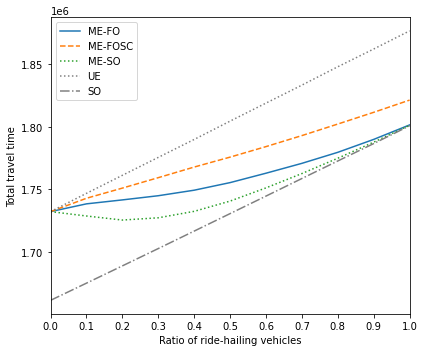

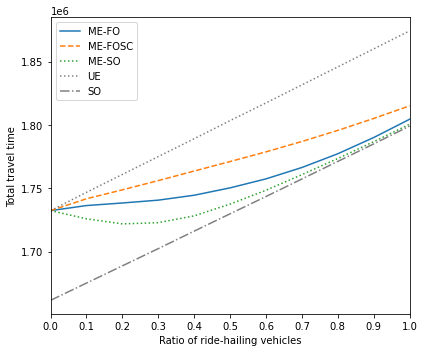

In [6]:
def plot_ME_TTT(file_ME_TTT, downtown_factor, directory):
    with open(file_ME_TTT.format("ME-FO", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_FO = record['TTT_list'] 

    # file = path.format("ME-FOSC")
    with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_FOSC = record['TTT_list'] 

    # file = path.format("ME-SO")
    with open(file_ME_TTT.format("ME-SO", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_SO = record['TTT_list'] 

# 'Baseline-SO', 'Baseline-UE'

    with open(file_ME_TTT.format('Baseline-UE', downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_Bs_UE = record['TTT_list'] 
    
    with open(file_ME_TTT.format('Baseline-SO', downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_Bs_SO = record['TTT_list'] 
    
    print(f"downtown factor {downtown_factor}, {TTT_FO[-1], TTT_SO[-1], TTT_Bs_SO[-1], TTT_FOSC[-1]}")

    x=np.arange(0, 1.1, 0.1)
    plt.figure(figsize=(6, 5))
    plt.plot(x, TTT_FO, label = "ME-FO")
    plt.plot(x, TTT_FOSC, linestyle='dashed', label = "ME-FOSC")
    plt.plot(x, TTT_SO, linestyle='dotted', label = "ME-SO")
    plt.plot(x, TTT_Bs_UE, linestyle='dotted', color= '0.5', label = "UE")
    plt.plot(x, TTT_Bs_SO, linestyle='dashdot', color= '0.5', label = "SO")
    # plt.axhline(y=TTT_SO[0], linestyle='dotted', color= '0.5', label = "UE")
    # plt.axhline(y=TTT_SO[-1], linestyle='dashdot', color= '0.5', label = "SO")
    plt.legend()
    plt.ylabel("Total travel time")
    plt.xlabel("Ratio of ride-hailing vehicles")
    plt.xlim(0, 1)
    plt.tight_layout()
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    fig_name = directory + "output/TTT of ME of SiouxFalls_downtown_{}.png".format(downtown_factor)
    plt.savefig(fig_name, dpi=800)
    print('TTT of ME is plotted and saved as {}'.format(fig_name))


for downtown_factor in [1 ,2]:
# for downtown_factor in [1]:
    plot_ME_TTT(file_ME_TTT, downtown_factor, directory)


Plot fleet travel time reduction from UE

FTT reduction of ME from UE is plotted and saved as Data/Networks/SiouxFalls/output/FTT reduction of ME from UE of SiouxFalls downtown_1.png
FTT reduction of ME from UE is plotted and saved as Data/Networks/SiouxFalls/output/FTT reduction of ME from UE of SiouxFalls downtown_2.png


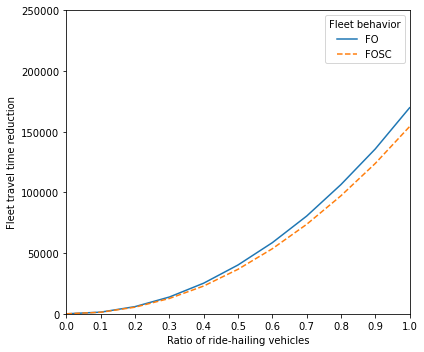

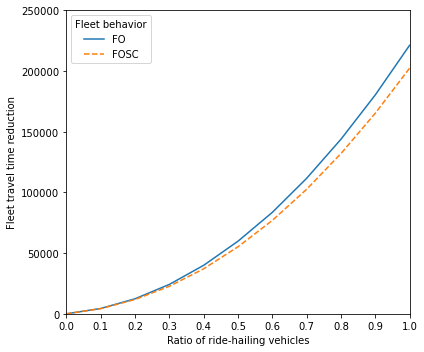

In [38]:
def plot_FTT_reduction(file_ME_TTT, downtown_factor, directory):

    with open(file_ME_TTT.format("ME-FO", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        FTT_FO = record['FTT_list']

    with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        FTT_FOSC = record['FTT_list']

    with open(file_ME_TTT.format('Baseline-UE', downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_Bs_UE = np.array(record['TTT_list'])
    
            
    x=np.arange(0, 1.1, 0.1)
    FTT_UE = TTT_Bs_UE * x
    plt.figure(figsize=(6, 5))
    FTT_red_FO = FTT_UE - FTT_FO
    FTT_red_FOSC = FTT_UE - FTT_FOSC
    plt.plot(x, FTT_red_FO, label = "FO")
    plt.plot(x, FTT_red_FOSC, linestyle='dashed', label = "FOSC")
    plt.legend(title="Fleet behavior")
    plt.ylabel("Fleet travel time reduction")
    plt.xlabel("Ratio of ride-hailing vehicles")
    plt.ylim(0, 250000)
    plt.xlim(0, 1)
    plt.tight_layout()
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    fig_name = directory + "output/FTT reduction of ME from UE of SiouxFalls downtown_{}.png".format(downtown_factor)
    plt.savefig(fig_name, dpi=800)
    print('FTT reduction of ME from UE is plotted and saved as {}'.format(fig_name))

for downtown_factor in [1 ,2]:
# for downtown_factor in [1]:
    plot_FTT_reduction(file_ME_TTT, downtown_factor, directory)

Plot loaded unfairness

<ipython-input-41-9131adc8b77b>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LU_FO_mat = np.array(LU_FO_list).tolist()
<ipython-input-41-9131adc8b77b>:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LU_FOSC_mat = np.array(LU_FOSC_list).tolist()
<ipython-input-41-9131adc8b77b>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  

Loaded unfairness is plotted and saved as Data/Networks/SiouxFalls/output/Loaded unfairness of SiouxFalls_downtown_1.png


<ipython-input-41-9131adc8b77b>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LU_FO_mat = np.array(LU_FO_list).tolist()
<ipython-input-41-9131adc8b77b>:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LU_FOSC_mat = np.array(LU_FOSC_list).tolist()
<ipython-input-41-9131adc8b77b>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  

Loaded unfairness is plotted and saved as Data/Networks/SiouxFalls/output/Loaded unfairness of SiouxFalls_downtown_2.png


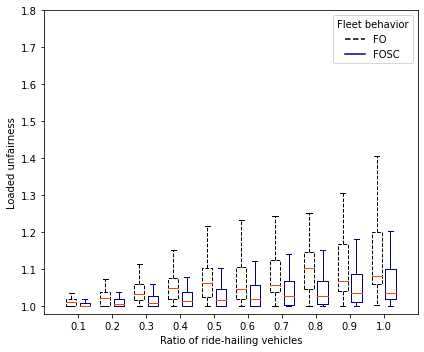

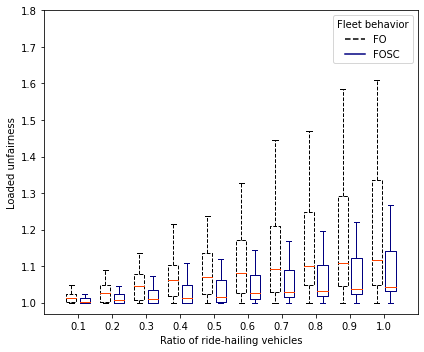

In [41]:
def plot_loaded_unfairness(file_ME_TTT, downtown_factor, directory):

    with open(file_ME_TTT.format("ME-FO", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        flows_FO_list = record['RH_path_flows_list']
        TT_FO_list = record['Path_TT_list']
        
    with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        flows_FOSC_list = record['RH_path_flows_list']
        TT_FOSC_list = record['Path_TT_list']
        
    def cal_weighted_LU(path_flows_RH, path_TT):
        LU_list = []
        # sum_LU = 0
        # sum_flow = 0
        for key in path_flows_RH.keys():
            flows = path_flows_RH[key]
            TT = path_TT[key]
            TT_min = min(TT)
            for i in range(len(flows)):
                weight = round(flows[i], 0)
    #             weight = round(flows[i] * 10, 0)
                LU = TT[i] / TT_min
                if weight > 0 and LU > 1:
                    LU_list.append((weight, LU, TT[i]))
        LU_list = np.array(LU_list, dtype=[('weight', int), ('LU', float), ('TT', float)])

        return LU_list


    LU_FO_list = []
    LU_FOSC_list = []
    _TT_FO_list = []
    _TT_FOSC_list =[]
    for i in range(1, 11):
        flows_FO = flows_FO_list[i]
        TT_FO = TT_FO_list[i]
        flows_FOSC = flows_FOSC_list[i]
        TT_FOSC = TT_FOSC_list[i]
        weighted_LU_FO = cal_weighted_LU(path_flows_RH=flows_FO, path_TT=TT_FO)
        weighted_LU_FOSC = cal_weighted_LU(path_flows_RH=flows_FOSC, path_TT=TT_FOSC)
        LU_FO = np.concatenate([np.repeat(d[1], d[0]) for d in weighted_LU_FO]).ravel()
        LU_FOSC = np.concatenate([np.repeat(d[1], d[0]) for d in weighted_LU_FOSC]).ravel()
        LU_FO_list.append(LU_FO.tolist())
        LU_FOSC_list.append(LU_FOSC.tolist())
                            
        _TT_FO = np.concatenate([np.repeat(d[2], d[0]) for d in weighted_LU_FO]).ravel()
        _TT_FOSC = np.concatenate([np.repeat(d[2], d[0]) for d in weighted_LU_FOSC]).ravel()
        _TT_FO_list.append(_TT_FO.tolist())
        _TT_FOSC_list.append(_TT_FOSC.tolist())

    LU_FO_mat = np.array(LU_FO_list).tolist()
    LU_FOSC_mat = np.array(LU_FOSC_list).tolist()

    _TT_FO_mat = np.array(_TT_FO_list)
    _TT_FOSC_mat = np.array(_TT_FOSC_list)

    def set_box_color(bp, linestyle, color):
        plt.setp(bp['boxes'], linestyle=linestyle, color=color)
        plt.setp(bp['whiskers'], linestyle=linestyle, color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color='orangered')

    x=np.round(np.arange(0.1, 1.1, 0.1), 1)

    plt.figure(figsize=(6, 5))
    bp_FO = plt.boxplot(LU_FO_mat, positions=np.array(range(x.shape[0]))*2.0-0.4, sym='', widths=0.6)
    bp_FOSC = plt.boxplot(LU_FOSC_mat, positions=np.array(range(x.shape[0]))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bp_FO, '--', 'black')
    set_box_color(bp_FOSC, '-', 'navy')
    plt.plot([], c='black', linestyle='--', label='FO')
    plt.plot([], c='navy', label='FOSC')
    plt.legend(title="Fleet behavior")

    plt.ylabel("Loaded unfairness")
    plt.xlabel("Ratio of ride-hailing vehicles")
    plt.xticks(range(0, len(x) * 2, 2), x)
    plt.xlim(-2, len(x)*2)
    plt.ylim(top=1.8)
    plt.tight_layout()
    fig_name = directory + "output/Loaded unfairness of SiouxFalls_downtown_{}.png".format(downtown_factor)
    plt.savefig(fig_name, dpi=800)
    print('Loaded unfairness is plotted and saved as {}'.format(fig_name))

for downtown_factor in [1 ,2]:
# for downtown_factor in [1]:
    plot_loaded_unfairness(file_ME_TTT, downtown_factor, directory)


# ORHP

In [9]:

from helper.Network import Network

def convert_dict_to_list(dict):
    list = []
    for key in dict.keys():
        list.append(dict[key])
    return np.array(list)

file_ME_VC = "Data/Networks/SiouxFalls/output/{}/mu_t_1.5_mu_p_2.0_downtown_1/VC ratios with demand ratio of 0.5.pickle"
path_ORHP = "Data/Networks/SiouxFalls/output/ORHP/mu_t_1.5_mu_p_2.0_downtown_1/"
file_ORHP_gamma_0 = path_ORHP + "gamma=0.0 lr=0.5 scheme=discriminatory subsidies.pickle"
file_ORHP_gamma_x = path_ORHP + "gamma={} lr=0.5 scheme=discriminatory subsidies.pickle"
downtown_factor = 1
net_name = 'SiouxFalls'

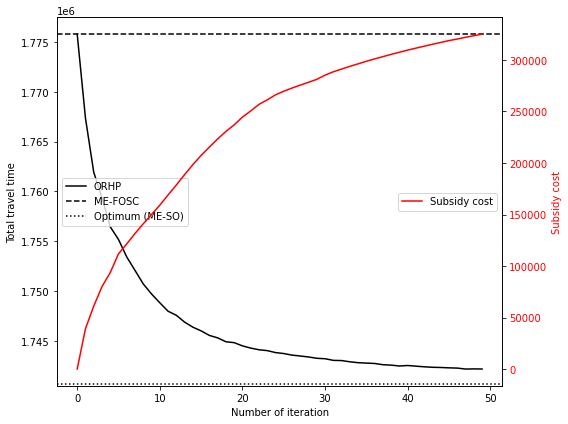

In [10]:
with open(file_ORHP_gamma_x.format(0.0), 'rb') as f:
    record_dict = pickle.load(f)
    TTT_list = record_dict['TTT_VS_iter']
    cost_omega_list = record_dict['subsidy_cost_VS_iter']
    obj_list = record_dict[ 'generalized_cost_VS_iter']
    vc_list = record_dict['link VC ratios']
    toll_list = record_dict['link subsidies (tolls)']

with open(file_ME_TTT.format("ME-SO", downtown_factor), 'rb') as f:
    record = pickle.load(f)
    TTT_SO = record['TTT_list'] 
    
with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
    record = pickle.load(f)
    TTT_FOSC = record['TTT_list'] 
    

fig, ax1 = plt.subplots(figsize=(8,6))

color = '0'
ax1.set_xlabel("Number of iteration")
ax1.set_ylabel('Total travel time', color=color)
# ax1.set_ylim(1.74e6, 1.78e6)
ax1.plot(TTT_list, color=color, label='ORHP')
plt.axhline(y=TTT_FOSC[5], color='black', linestyle='dashed', label = "ME-FOSC")
plt.axhline(y=TTT_SO[5], color='black', linestyle='dotted', label = "Optimum (ME-SO)")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Subsidy cost', color=color)  # we already handled the x-label with ax1
ax2.plot(cost_omega_list, color=color, label='Subsidy cost')
# ax1.set_ylim(0, 1.78e6)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='center left')
ax2.legend(loc='center right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig_name = directory + "output/ORHP (gamma=0) of SiouxFalls.png"
plt.savefig(fig_name, dpi=800)

trips are loaded successfully.
Data/Networks/SiouxFalls/output/VC ratios of ME-FOSC.png


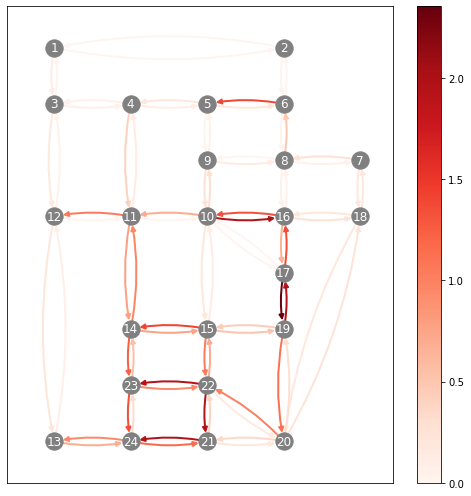

Data/Networks/SiouxFalls/output/VC change from FOSC to ME-SO.png


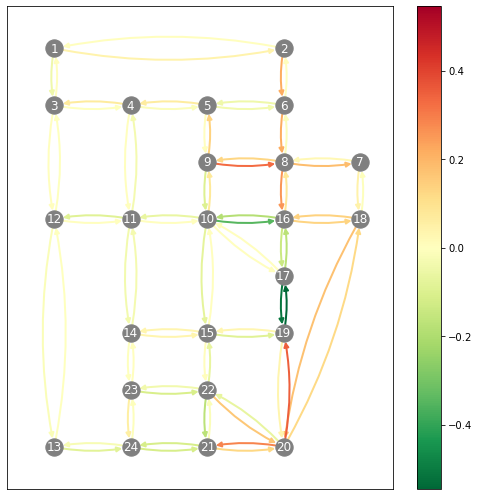

Data/Networks/SiouxFalls/output/VC change from FOSC to ORHP.png


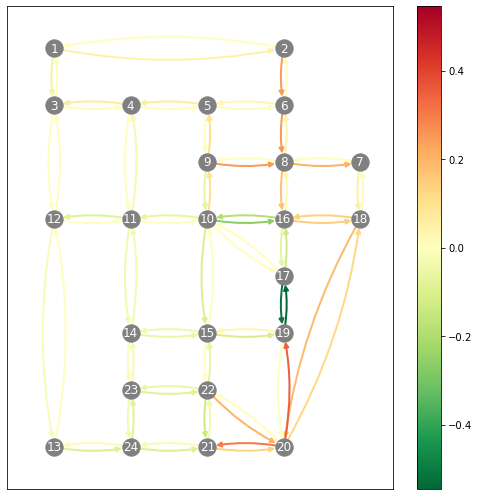

trips are loaded successfully.
Data/Networks/SiouxFalls/output/subsidy distribution.png


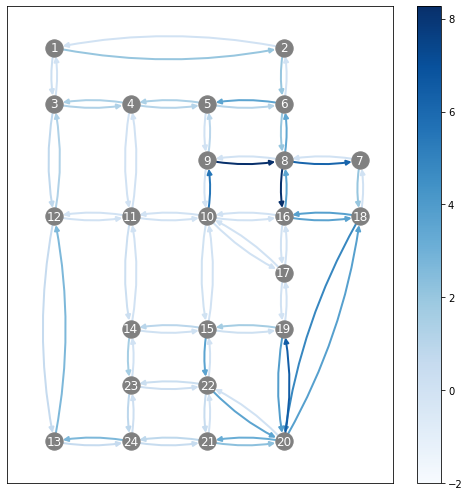

In [11]:


with open(file_ORHP_gamma_0, 'rb') as f:
    # [TTT_list, cost_omega_list, obj_list, _, _, vc_list, toll_list] = pickle.load(f)
    '''
    record = {
        'TTT_VS_iter': TTT_list,
        'subsidy_cost_VS_iter': cost_omega_list,
        'generalized_cost_VS_iter': obj_list,
        'FTT_VS_iter': FTT_list,
        'link VC ratios': vc_list,
        'link subsidies (tolls)': toll_list,
        'path_flows_driving': path_flows_driving, 
        'path_flows_ride_hailing': path_flows_ride_hailing,
        'path_subsidies': path_subsidies
        }
    '''
    record_dict = pickle.load(f)
    TTT_list = record_dict['TTT_VS_iter']
    cost_omega_list = record_dict['subsidy_cost_VS_iter']
    obj_list = record_dict[ 'generalized_cost_VS_iter']
    vc_list = record_dict['link VC ratios']
    toll_list = record_dict['link subsidies (tolls)']


edge_toll_ORHP = convert_dict_to_list(toll_list)
nw = Network(downtown_factor=downtown_factor, net_name=net_name, net_file=net_file, 
             trip_file=trip_file, node_file=node_file, path_set_size=10, mu_t=1,
                 mu_u=0.5, mu_p=1.5, demand_ratio=0.5)

# ----plot vc distribution of FOSC
ME = 'ME-FOSC'
with open(file_ME_VC.format(ME), 'rb') as f:
    edge_vc_dict_FOSC = pickle.load(f)
edge_vc_FOSC = convert_dict_to_list(edge_vc_dict_FOSC)
plt.rcParams["figure.figsize"] = (7, 7)
cmap = plt.cm.get_cmap('Reds')
pos = {n: nw.graph.nodes[n]["pos"] for n in list(nw.graph.nodes)}
nx.draw_networkx_nodes(G=nw.graph, pos=pos, node_color='grey')
nx.draw_networkx_labels(G=nw.graph, pos=pos, font_color='w')
edge_colors = edge_vc_FOSC
vmin, vmax = np.min(edge_colors), np.max(edge_colors)
# vmin = 0.5
edges = nx.draw_networkx_edges(G=nw.graph, pos=pos, edge_color=edge_colors, edge_cmap=cmap, width=2, edge_vmin=vmin, edge_vmax=vmax, connectionstyle='arc3, rad = 0.1')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
plt.colorbar(sm)
fig_name = directory + "output/VC ratios of {}.png".format(ME)
plt.tight_layout()
plt.savefig(fig_name, dpi=800)
print(fig_name)
plt.show()

# ----plot vc change from FOSC to SO
ME = 'ME-SO'
with open(file_ME_VC.format(ME), 'rb') as f:
    edge_vc_dict_SO = pickle.load(f)
edge_vc_SO = convert_dict_to_list(edge_vc_dict_SO)
plt.rcParams["figure.figsize"] = (7, 7)
cmap = plt.cm.get_cmap('RdYlGn_r')
pos = {n: nw.graph.nodes[n]["pos"] for n in list(nw.graph.nodes)}
nx.draw_networkx_nodes(G=nw.graph, pos=pos, node_color='grey')
nx.draw_networkx_labels(G=nw.graph, pos=pos, font_color='w')
edge_colors = edge_vc_SO - edge_vc_FOSC
x_max = np.abs(edge_colors).max() 
vmin, vmax = -x_max, x_max
edges = nx.draw_networkx_edges(G=nw.graph, pos=pos, edge_color=edge_colors, edge_cmap=cmap, width=2, edge_vmin=vmin, edge_vmax=vmax, connectionstyle='arc3, rad = 0.1')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
plt.colorbar(sm)
fig_name = directory + "output/VC change from FOSC to {}.png".format(ME)
plt.tight_layout()
plt.savefig(fig_name, dpi=800)
print(fig_name)
plt.show()


# ----plot vc change from FOSC to ORHP
ME = 'ORHP'

with open(file_ORHP_gamma_0, 'rb') as f:
    # [TTT_list, cost_omega_list, obj_list, _, _, vc_list, toll_list] = pickle.load(f)
    record_dict = pickle.load(f)
    TTT_list = record_dict['TTT_VS_iter']
    cost_omega_list = record_dict['subsidy_cost_VS_iter']
    obj_list = record_dict[ 'generalized_cost_VS_iter']
    vc_list = record_dict['link VC ratios']
    toll_list = record_dict['link subsidies (tolls)']
    
edge_vc_ORHP = convert_dict_to_list(vc_list)
plt.rcParams["figure.figsize"] = (7, 7)
cmap = plt.cm.get_cmap('RdYlGn_r')
pos = {n: nw.graph.nodes[n]["pos"] for n in list(nw.graph.nodes)}
nx.draw_networkx_nodes(G=nw.graph, pos=pos, node_color='grey')
nx.draw_networkx_labels(G=nw.graph, pos=pos, font_color='w')
edge_colors = edge_vc_ORHP - edge_vc_FOSC
# vmin, vmax = np.min(edge_colors), np.max(edge_colors)
edges = nx.draw_networkx_edges(G=nw.graph, pos=pos, edge_color=edge_colors, edge_cmap=cmap, width=2, edge_vmin=vmin, edge_vmax=vmax, connectionstyle='arc3, rad = 0.1')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
plt.colorbar(sm)
fig_name = directory + "output/VC change from FOSC to {}.png".format(ME)
plt.tight_layout()
plt.savefig(fig_name, dpi=800)
print(fig_name)
plt.show()

# ----plot subsidy distribution
edge_toll_ORHP = convert_dict_to_list(toll_list)
nw = Network(downtown_factor=downtown_factor, net_name=net_name, net_file=net_file, trip_file=trip_file, 
             node_file=node_file, path_set_size=10, mu_t=1,
             mu_u=0.5, mu_p=1.5, demand_ratio=0.5)
plt.rcParams["figure.figsize"] = (7, 7)
cmap = plt.cm.get_cmap('Blues')
pos = {n: nw.graph.nodes[n]["pos"] for n in list(nw.graph.nodes)}
nx.draw_networkx_nodes(G=nw.graph, pos=pos, node_color='grey')
nx.draw_networkx_labels(G=nw.graph, pos=pos, font_color='w')
edge_colors = edge_toll_ORHP
vmin, vmax = np.min(edge_colors), np.max(edge_colors)

edges = nx.draw_networkx_edges(G=nw.graph, pos=pos, edge_color=edge_colors, edge_cmap=cmap, edge_vmin=vmin-2, edge_vmax=vmax, width=2, connectionstyle='arc3, rad = 0.1')
# edges = nx.draw_networkx_edges(G=nw.graph, pos=pos, edge_color='grey', width=0.5)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin-2, vmax=vmax))
plt.colorbar(sm)
fig_name = directory + "output/subsidy distribution.png"
plt.tight_layout()
plt.savefig(fig_name, dpi=800)
print(fig_name)
plt.show()


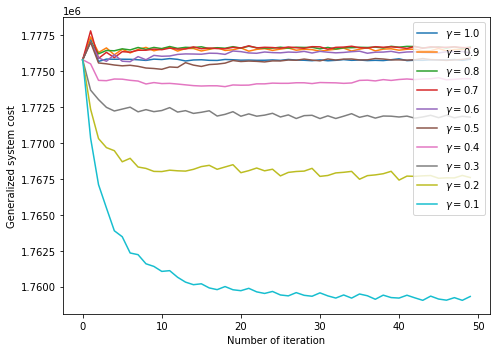

In [12]:
fig, ax1 = plt.subplots(figsize=(7,5))
for i in np.round(np.arange(0.1, 1.1, 0.1), 1)[::-1]:
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
            record_dict = pickle.load(f)
            TTT_list = record_dict['TTT_VS_iter']
            cost_omega_list = record_dict['subsidy_cost_VS_iter']
            obj_list = record_dict[ 'generalized_cost_VS_iter']
            vc_list = record_dict['link VC ratios']
            toll_list = record_dict['link subsidies (tolls)']
    ax1.plot(obj_list, label=r'$\gamma={}$'.format(i))

ax1.set_xlabel("Number of iteration")
ax1.set_ylabel('Generalized system cost')
ax1.tick_params(axis='y')
ax1.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig_name = directory + "output/ORHP generalized cost.png"
plt.tight_layout()
plt.savefig(fig_name, dpi=800)
plt.show()

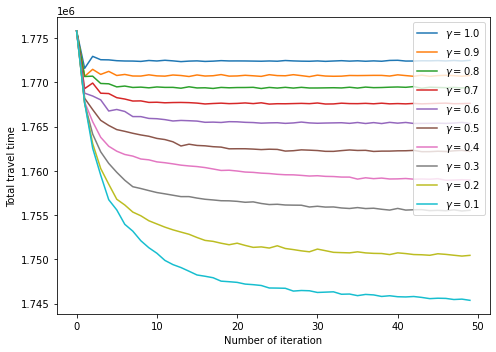

In [13]:
fig, ax1 = plt.subplots(figsize=(7,5))
for i in np.round(np.arange(0.1, 1.1, 0.1), 1)[::-1]:
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        TTT_list = record_dict['TTT_VS_iter']
        cost_omega_list = record_dict['subsidy_cost_VS_iter']
        obj_list = record_dict[ 'generalized_cost_VS_iter']
        vc_list = record_dict['link VC ratios']
        toll_list = record_dict['link subsidies (tolls)']
    ax1.plot(TTT_list, label=r'$\gamma={}$'.format(i))

ax1.set_xlabel("Number of iteration")
ax1.set_ylabel('Total travel time')
ax1.tick_params(axis='y')
ax1.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig_name = directory + "output/ORHP TTT.png"
plt.tight_layout()
plt.savefig(fig_name, dpi=800)
plt.show()

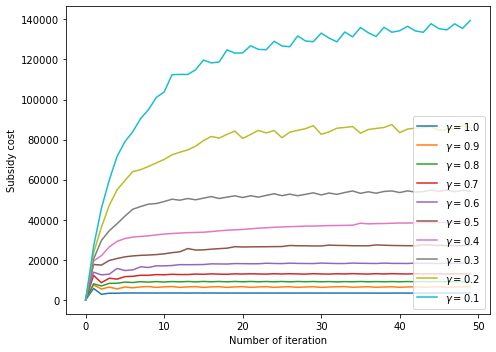

In [14]:
fig, ax1 = plt.subplots(figsize=(7,5))
for i in np.round(np.arange(0.1, 1.1, 0.1), 1)[::-1]:
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        TTT_list = record_dict['TTT_VS_iter']
        cost_omega_list = record_dict['subsidy_cost_VS_iter']
        obj_list = record_dict[ 'generalized_cost_VS_iter']
        vc_list = record_dict['link VC ratios']
        toll_list = record_dict['link subsidies (tolls)']
    ax1.plot(cost_omega_list, label=r'$\gamma={}$'.format(i))

ax1.set_xlabel("Number of iteration")
ax1.set_ylabel('Subsidy cost')
ax1.tick_params(axis='y')
ax1.legend(loc='lower right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig_name = directory + "output/ORHP subsidy cost.png"
plt.tight_layout()
plt.savefig(fig_name, dpi=800)
plt.show()

trips are loaded successfully.


No handles with labels found to put in legend.


0.1 0.368


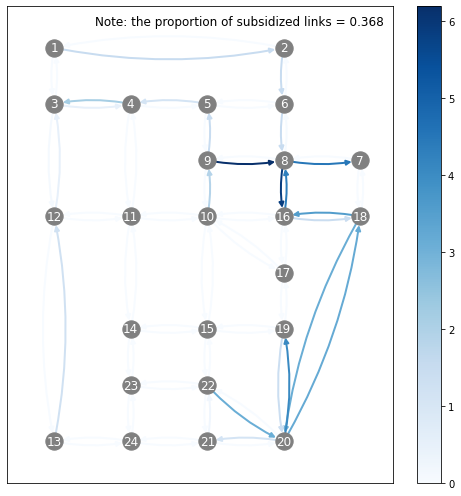

trips are loaded successfully.


No handles with labels found to put in legend.


0.4 0.145


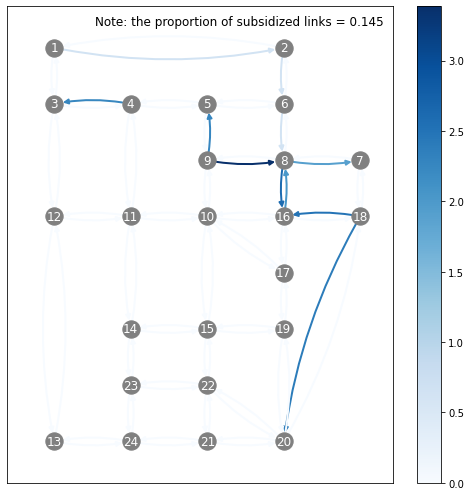

trips are loaded successfully.


No handles with labels found to put in legend.


0.7 0.145


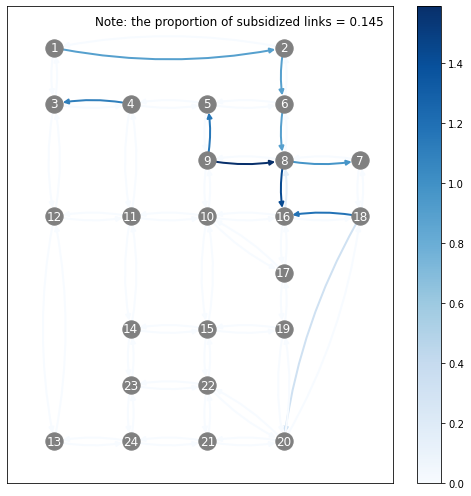

trips are loaded successfully.


No handles with labels found to put in legend.


1.0 0.105


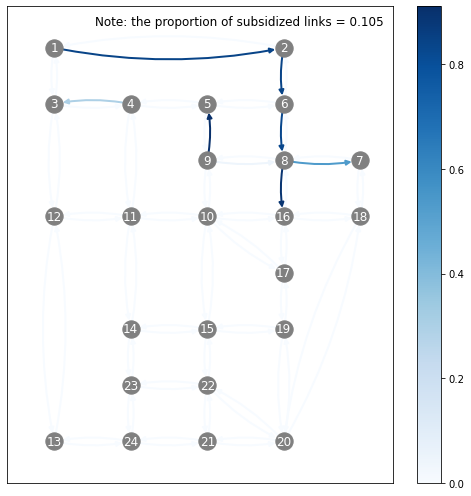

In [15]:
# ----plot subsidy distribution with different gammas
for i in np.round(np.arange(0.1, 1.1, 0.3), 1):
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        TTT_list = record_dict['TTT_VS_iter']
        cost_omega_list = record_dict['subsidy_cost_VS_iter']
        obj_list = record_dict[ 'generalized_cost_VS_iter']
        vc_list = record_dict['link VC ratios']
        toll_list = record_dict['link subsidies (tolls)']
        
    edge_toll_ORHP = convert_dict_to_list(toll_list)
    nw = Network(downtown_factor=downtown_factor, net_name=net_name, net_file=net_file, 
                 trip_file=trip_file, node_file=node_file, path_set_size=10, mu_t=1,
                 mu_u=0.5, mu_p=1.5, demand_ratio=0.5)
    plt.rcParams["figure.figsize"] = (7, 7)
    cmap = plt.cm.get_cmap('Blues')
    pos = {n: nw.graph.nodes[n]["pos"] for n in list(nw.graph.nodes)}
    nx.draw_networkx_nodes(G=nw.graph, pos=pos, node_color='grey')
    nx.draw_networkx_labels(G=nw.graph, pos=pos, font_color='w')
    edge_colors = edge_toll_ORHP
    
    vmin, vmax = np.min(edge_colors), np.max(edge_colors)
    
    edges = nx.draw_networkx_edges(G=nw.graph, pos=pos, edge_color=edge_colors, edge_cmap=cmap, width=2, edge_vmin=vmin, edge_vmax=vmax, connectionstyle='arc3, rad = 0.1')
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    plt.colorbar(sm)
    plt.tight_layout()
    num_subsidized = np.round(edge_colors[edge_colors > 0].size / edge_colors.size, 3)
    plt.legend(loc='upper right', title_fontsize='large' ,title='Note: the proportion of subsidized links = {}'.format(num_subsidized), frameon=False)
#     plt.annotate(num_subsidized, xy=(4, 7))
    print(i, num_subsidized)
    fig_name = directory + "output/ORHP subsidy distribution (gamma={}).png".format(i)
    plt.savefig(fig_name, dpi=800)
    plt.show()


trips are loaded successfully.


No handles with labels found to put in legend.


0.1 0.368


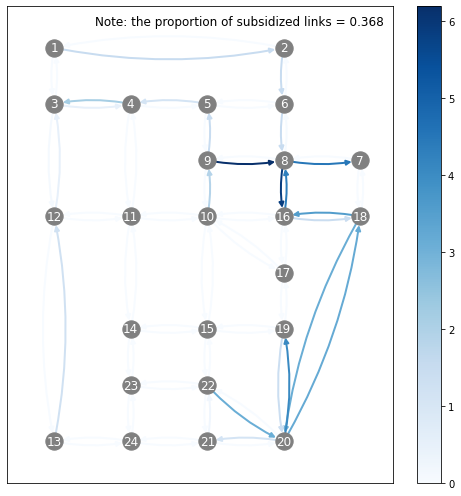

trips are loaded successfully.


No handles with labels found to put in legend.


0.3 0.224


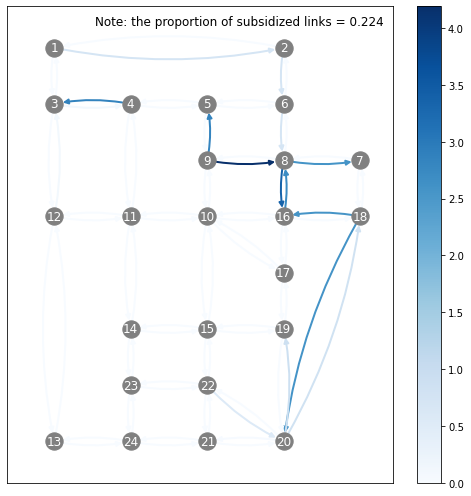

trips are loaded successfully.


No handles with labels found to put in legend.


0.5 0.145


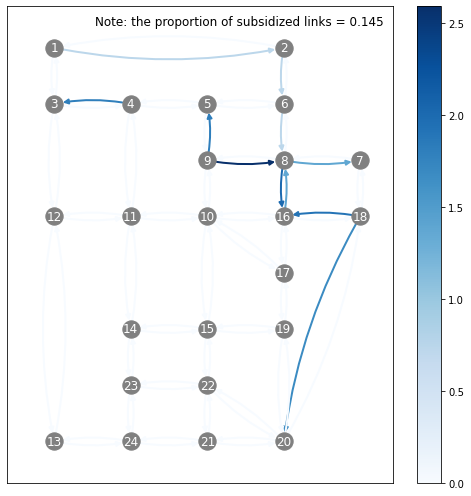

trips are loaded successfully.


No handles with labels found to put in legend.


0.7 0.145


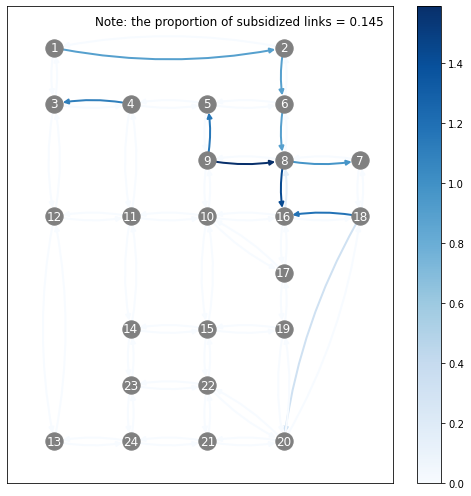

In [16]:
# ----plot subsidy distribution with different gammas
for i in np.round(np.arange(0.1, 0.9, 0.2), 1):
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        TTT_list = record_dict['TTT_VS_iter']
        cost_omega_list = record_dict['subsidy_cost_VS_iter']
        obj_list = record_dict[ 'generalized_cost_VS_iter']
        vc_list = record_dict['link VC ratios']
        toll_list = record_dict['link subsidies (tolls)']
        
    edge_toll_ORHP = convert_dict_to_list(toll_list)
    nw = Network(downtown_factor=downtown_factor, net_name=net_name, net_file=net_file, 
                 trip_file=trip_file, node_file=node_file, path_set_size=10, mu_t=1,
                 mu_u=0.5, mu_p=1.5, demand_ratio=0.5)
    plt.rcParams["figure.figsize"] = (7, 7)
    cmap = plt.cm.get_cmap('Blues')
    pos = {n: nw.graph.nodes[n]["pos"] for n in list(nw.graph.nodes)}
    nx.draw_networkx_nodes(G=nw.graph, pos=pos, node_color='grey')
    nx.draw_networkx_labels(G=nw.graph, pos=pos, font_color='w')
    edge_colors = edge_toll_ORHP
    
    vmin, vmax = np.min(edge_colors), np.max(edge_colors)
    
    edges = nx.draw_networkx_edges(G=nw.graph, pos=pos, edge_color=edge_colors, edge_cmap=cmap, width=2, edge_vmin=vmin, edge_vmax=vmax, connectionstyle='arc3, rad = 0.1')
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    plt.colorbar(sm)
    plt.tight_layout()
    num_subsidized = np.round(edge_colors[edge_colors > 0].size / edge_colors.size, 3)
    plt.legend(loc='upper right', title_fontsize='large' ,title='Note: the proportion of subsidized links = {}'.format(num_subsidized), frameon=False)
#     plt.annotate(num_subsidized, xy=(4, 7))
    print(i, num_subsidized)
    fig_name = directory + "output/ORHP subsidy distribution (gamma={}).png".format(i)
    plt.savefig(fig_name, dpi=800)
    plt.show()


[-321952.0855978354, -136584.17734539788, -85592.88196359956, -54356.343662818734, -38701.67046396128, -27176.005996321455, -18241.20793253099, -12937.498808923114, -9084.350876713981, -6438.137189146279, -3360.8935929687664] 
 [33591.99512454425, 30299.350201369496, 25311.729932774324, 20282.672861711355, 16813.172620388214, 13577.346815560479, 10417.917117937934, 8194.753114789026, 6409.943820029963, 5060.05059988494, 3366.336023094598]


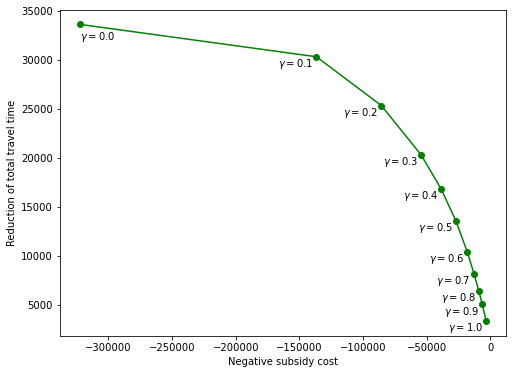

In [17]:
from adjustText import adjust_text
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate

with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
    record = pickle.load(f)
    TTT_FOSC_list = record['TTT_list'] 
    TTT_FOSC = TTT_FOSC_list[5]  # TTT of ME-FOSC with demand ratio of 0.5

TTT_red = []
subsidy_cost = []

plt.figure(figsize=(8, 6))

for i in np.arange(0, 1.1, 0.1):
    i = np.round(i, 1)
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        TTT_list = record_dict['TTT_VS_iter']
        cost_omega_list = record_dict['subsidy_cost_VS_iter']
        obj_list = record_dict[ 'generalized_cost_VS_iter']
        vc_list = record_dict['link VC ratios']
        toll_list = record_dict['link subsidies (tolls)']
    red =TTT_FOSC - sum(TTT_list[-5:])/5
    ave_subsidy_cost = -sum(cost_omega_list[-5:])/5
    TTT_red.append(red)
    subsidy_cost.append(ave_subsidy_cost)
    if i==0:
        plt.annotate(r'$\gamma={}$'.format(i), xy=(ave_subsidy_cost, red-1500))
    else:
        plt.annotate(r'$\gamma={}$'.format(i), xy=(ave_subsidy_cost-30000, red-1000))

f = interpolate.interp1d(subsidy_cost, TTT_red)
x = np.arange(min(subsidy_cost), max(subsidy_cost), 100)
y = f(x)  
plt.plot(subsidy_cost, TTT_red, '-o', color='g')
plt.xlabel("Negative subsidy cost")
plt.ylabel("Reduction of total travel time")
fig.tight_layout()
fig_name = directory + "output/Pareto frontier.png"
plt.savefig(fig_name, dpi=800)
print(subsidy_cost, '\n', TTT_red)
plt.show()

In [18]:
def calculate_average_OD_subsidies(subsidies, path_RH_flows):
    average_OD_subsidies = {}
    for key in subsidies:
        flows = path_RH_flows[key]
        OD_subsidies = subsidies[key]
        assert len(flows) == len(OD_subsidies), "the number of path flows should equal to the number of subsidies"
        average_OD_subsidy = np.sum(np.multiply(np.array(flows), np.array(OD_subsidies)))/sum(flows)
        if average_OD_subsidy>0:
            average_OD_subsidies[key] = average_OD_subsidy

    return average_OD_subsidies
        

subsidies_boxplot = []
for i in np.arange(0, 1.1, 0.1):
    i = np.round(i, 1)
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        subsidies = record_dict['path_subsidies']
        path_RH_flows = record_dict['path_flows_ride_hailing']
        average_OD_subsidies = calculate_average_OD_subsidies(subsidies, path_RH_flows)
        subsidies_boxplot.append(list(average_OD_subsidies.values()))

print("the number of OD pairs", len(list(path_RH_flows.keys())))
        

        

the number of OD pairs 58


[<matplotlib.lines.Line2D object at 0x7feb98cb76d0>, <matplotlib.lines.Line2D object at 0x7feb99e5e640>, <matplotlib.lines.Line2D object at 0x7feb98fc9ee0>, <matplotlib.lines.Line2D object at 0x7febc81110a0>, <matplotlib.lines.Line2D object at 0x7feb98c097f0>, <matplotlib.lines.Line2D object at 0x7feb9afd7340>, <matplotlib.lines.Line2D object at 0x7feb9a3acd00>, <matplotlib.lines.Line2D object at 0x7feb9916caf0>, <matplotlib.lines.Line2D object at 0x7feb9a41e970>, <matplotlib.lines.Line2D object at 0x7feb98d36c40>, <matplotlib.lines.Line2D object at 0x7feb98c1a4c0>]


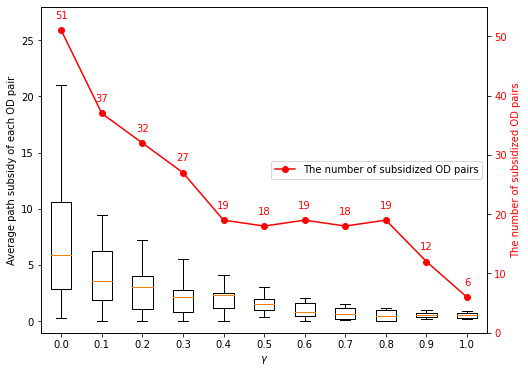

In [19]:
fig, ax1 = plt.subplots(figsize=(8,6))

bp_dict = ax1.boxplot(subsidies_boxplot)
print(bp_dict['medians'])
x = range(1, 12)
ax1.set_xlabel("$\gamma$")
ax1.set_ylabel("Average path subsidy of each OD pair")
ax1.set_ylim(ymax=28)

OD_num = [len(subsidies_boxplot[x_i-1]) for x_i in x]

ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('The number of subsidized OD pairs', color=color)  # we already handled the x-label with ax1
ax2.plot(x, OD_num, color=color, marker='o', label='The number of subsidized OD pairs')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='center right')
ax2.set_ylim(ymin=0, ymax=55)
plt.xticks(x, [round(i, 1) for i in np.arange(0, 1.1, 0.1)])

for i in range(len(x)):
    # get position data for median line
    ax2.text(x[i], OD_num[i] + 2, OD_num[i], horizontalalignment='center', color='red')


fig_name = directory + "output/path subsidies.png"
plt.savefig(fig_name, dpi=800)
plt.show()

# for tick,label in zip(x, bp_dict.get_xticklabels()):
#     bp.text(x[tick]+1, fake_data.median()[tick] + 1, noofobs[tick], 
#             horizontalalignment='center', color='blue', weight='bold')

# for line in bp_dict['medians']:
#     # get position data for median line
#     x, y = line.get_xydata()[1] # top of median line
#     # overlay median value
#     plt.text(x-0.3, 20, '%.1f' % y,
#          horizontalalignment='center', color='red')


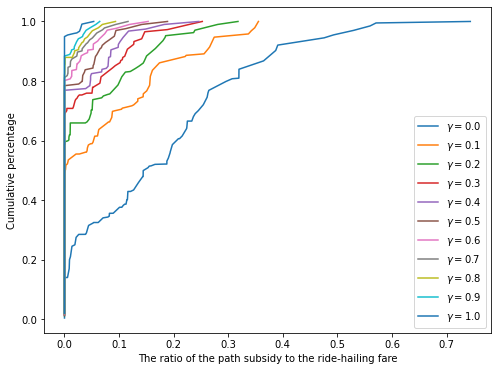

In [20]:
def calculate_path_subsidy_vs_TT(subsidies, path_TT, path_RH_flows):
    subsidy_vs_TT = []
    weight_flow = []

    for key in subsidies:
        flows = path_RH_flows[key]
        OD_subsidies = subsidies[key]
        TTs = path_TT[key]
        assert len(flows) == len(OD_subsidies) and len(OD_subsidies) == len(TTs), "the number of path flows, the number of subsidies"
        for flow, subsidy, TT in zip(flows, OD_subsidies, TTs):
            if flow > 0:
                subsidy_vs_TT.append(subsidy / TT)
                weight_flow.append(flow)

    return subsidy_vs_TT, weight_flow

plt.figure(figsize=(8, 6))

mu_p = 2
for i in np.arange(0, 1.1, 0.1):
    i = np.round(i, 1)
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        subsidies = record_dict['path_subsidies']
        path_RH_flows = record_dict['path_flows_ride_hailing']
        path_TT = record_dict['path_TT']
        data, weights = calculate_path_subsidy_vs_TT(subsidies, path_TT, path_RH_flows)


    data = np.array(data) / mu_p
    weights = np.array(weights)
    # sort the data and weights in ascending order of data
    sort_idx = np.argsort(data)
    data_sorted = data[sort_idx]
    weights_sorted = weights[sort_idx]

    # calculate the weighted CDF using numpy
    weighted_sum = np.cumsum(weights_sorted)
    weighted_cdf = weighted_sum / weighted_sum[-1]

    # plot the weighted CDF using matplotlib
    plt.plot(data_sorted, weighted_cdf, label=r'$\gamma={}$'.format(i))
plt.xlabel('The ratio of the path subsidy to the ride-hailing fare')
plt.ylabel('Cumulative percentage')
plt.legend()
# fig, ax1 = plt.subplots(figsize=(8,6))
# plt.title('Weighted CDF of Data')
fig_name = directory + "output/ratio of subsidy to the ride-hailing fare.png"
plt.savefig(fig_name, dpi=800)




### Different initial points

trips are loaded successfully.
('2', '1') 2.4111
('4', '11') 2.2722
('11', '4') 3.48
('8', '7') 7.7813
('18', '20') 2.5835
('16', '18') 5.1459
1.0 0.921


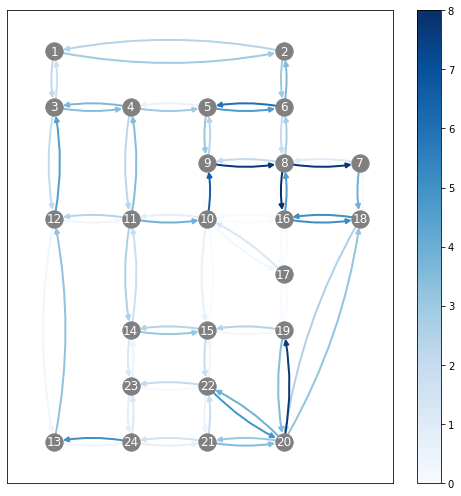

trips are loaded successfully.
('2', '1') 0.0005
('4', '11') 0.8178
('11', '4') 0.2924
('8', '7') 4.7377
('18', '20') 6.1568
('16', '18') 1.4408
1.0 0.908


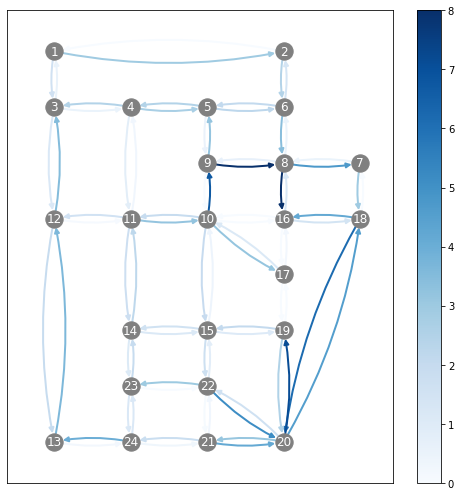

trips are loaded successfully.
('2', '1') 2.1986
('4', '11') 0.5383
('11', '4') 0.3186
('8', '7') 4.9098
('18', '20') 5.7077
('16', '18') 3.1965
1.0 0.908


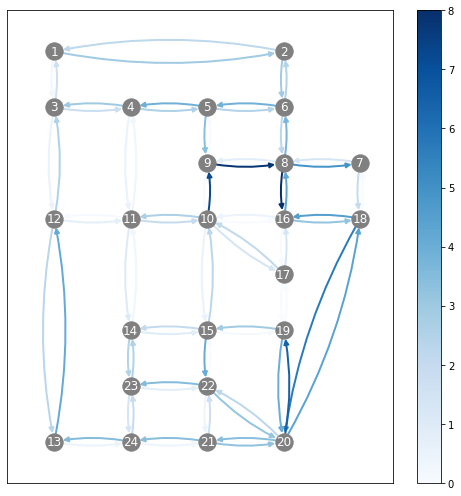

trips are loaded successfully.
('2', '1') 1.1636
('4', '11') 2.5966
('11', '4') 1.6604
('8', '7') 2.5956
('18', '20') 4.3326
('16', '18') 4.5429
1.0 0.947


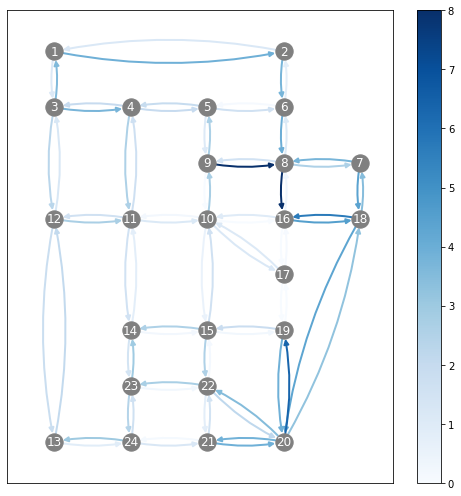

trips are loaded successfully.
('2', '1') 0.8269
('4', '11') 1.6568
('11', '4') 1.8194
('8', '7') 7.4726
('18', '20') 3.8968
('16', '18') 6.4066
1.0 0.908


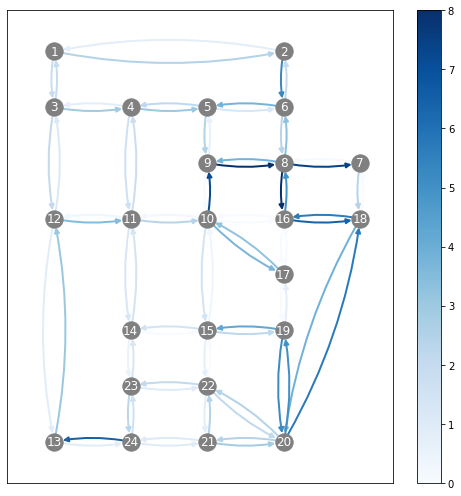

In [23]:
# ----plot subsidy distribution with different gammas
file_ORHP_seed = path_ORHP + "gamma=0 lr=0.5 scheme=discriminatory subsidies random_seed={}.pickle"


for seed in [0, 1, 2, 3, 5]:
    with open(file_ORHP_seed.format(seed), 'rb') as f:
        record_dict = pickle.load(f)
        TTT_list = record_dict['TTT_VS_iter']
        cost_omega_list = record_dict['subsidy_cost_VS_iter']
        obj_list = record_dict[ 'generalized_cost_VS_iter']
        vc_list = record_dict['link VC ratios']
        toll_list = record_dict['link subsidies (tolls)']
        
    edge_toll_ORHP = convert_dict_to_list(toll_list)
    nw = Network(downtown_factor=downtown_factor, net_name=net_name, net_file=net_file, 
                 trip_file=trip_file, node_file=node_file, path_set_size=10, mu_t=1,
                 mu_u=0.5, mu_p=1.5, demand_ratio=0.5)
    plt.rcParams["figure.figsize"] = (7, 7)
    cmap = plt.cm.get_cmap('Blues')
    pos = {n: nw.graph.nodes[n]["pos"] for n in list(nw.graph.nodes)}
    nx.draw_networkx_nodes(G=nw.graph, pos=pos, node_color='grey')
    nx.draw_networkx_labels(G=nw.graph, pos=pos, font_color='w')
    edge_colors = edge_toll_ORHP
    for key in toll_list:
        if key in [('2', '1'), ('4', '11'), ('11', '4'), ('8', '7'), ('16', '18'), ('18', '20')]:
            print(key, toll_list[key])
    
    # vmin, vmax = np.min(edge_colors), np.max(edge_colors)

    vmin, vmax = 0, 8

    edges = nx.draw_networkx_edges(G=nw.graph, pos=pos, edge_color=edge_colors, edge_cmap=cmap, width=2, edge_vmin=vmin, edge_vmax=vmax, connectionstyle='arc3, rad = 0.1')
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    plt.colorbar(sm)
    plt.tight_layout()
    num_subsidized = np.round(edge_colors[edge_colors > 0].size / edge_colors.size, 3)
    # plt.legend(loc='upper right', title_fontsize='large' ,title='Note: the proportion of subsidized links = {}'.format(num_subsidized), frameon=False)
#     plt.annotate(num_subsidized, xy=(4, 7))
    print(i, num_subsidized)
    fig_name = directory + "output/ORHP subsidy distribution (seed={}).png".format(seed)
    plt.savefig(fig_name, dpi=800)
    plt.show()


trips are loaded successfully.


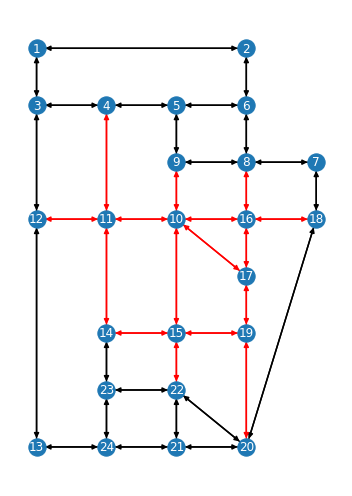

In [43]:
# ----plot downtown area
file_ORHP_seed = path_ORHP + "gamma=0 lr=0.5 scheme=discriminatory subsidies random_seed={}.pickle"

downtown_OD = [10, 11, 15, 16, 17, 19]

for seed in [0]:
    with open(file_ORHP_seed.format(seed), 'rb') as f:
        record_dict = pickle.load(f)
        toll_list = record_dict['link subsidies (tolls)']
        
    
    nw = Network(downtown_factor=downtown_factor, net_name=net_name, net_file=net_file, 
                 trip_file=trip_file, node_file=node_file, path_set_size=10, mu_t=1,
                 mu_u=0.5, mu_p=1.5, demand_ratio=0.5)
    plt.rcParams["figure.figsize"] = (5, 7)
    ax = plt.gca()
    ax.set_axis_off()
    cmap = plt.cm.get_cmap('Blues')
    pos = {n: nw.graph.nodes[n]["pos"] for n in list(nw.graph.nodes)}
    nx.draw_networkx_nodes(G=nw.graph, pos=pos)
    nx.draw_networkx_labels(G=nw.graph, pos=pos, font_color='w')

    

    for key in toll_list:
        if int(key[0]) in downtown_OD or int(key[1]) in downtown_OD:
            toll_list[key] = "red"
        else:
            toll_list[key] = "black"
    
    edge_colors = convert_dict_to_list(toll_list)

    edges = nx.draw_networkx_edges(G=nw.graph, pos=pos, edge_color=edge_colors, width=1.5)
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # plt.colorbar(sm)
    plt.tight_layout()
    # num_subsidized = np.round(edge_colors[edge_colors > 0].size / edge_colors.size, 3)
    # plt.legend(loc='upper right', title_fontsize='large' ,title='Note: the proportion of subsidized links = {}'.format(num_subsidized), frameon=False)
#     plt.annotate(num_subsidized, xy=(4, 7))
    # print(i, num_subsidized)
    fig_name = directory + "Sioux Falls network.jpg"
    plt.savefig(fig_name, dpi=800)
    plt.show()